In [290]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
import matplotlib.patches as patches
from matplotlib import rcParams
from highlight_text import ax_text, fig_text
import json
import pandas as pd
from PIL import Image
import urllib
import os

In [291]:
path_to_json = r'C:\Users\al.eriksson\Documents\Python\Football\allsvenskan2021' 

json_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json')]


In [292]:
# Collect all matches from directory in a dataframe
all_matches = []

for i in list(range(0,len(json_files))):
  dir = r'C:\Users\al.eriksson\Documents\Python\Football\allsvenskan2021' 
  f = open (dir + '/' + json_files[i])  
  matches = json.loads(f.read()) 
  matches = pd.DataFrame(matches['events']) 
  all_matches.append(matches)
   

all_matches_df = pd.concat(all_matches)

# Shot on target | Goal = what to look for

In [299]:
# filtered_df = all_matches_df[((all_matches_df['action'] == 'Goal') | (all_matches_df['action'] == 'Shot on target')) & (all_matches_df['player'] == 'Per Frick')]
# filtered_df

,xdest,xpos,header,next_player,game_time,ypos,xg,ydest,player,penalty,...,xp,throw_in,external_id,start_time,xt,one_touch,foot_used,attack_type,corner_outcome,goal_mouth
910,NaN,89,False,NaN,50,56,0.1352,NaN,Per Frick,False,...,NaN,False,910,2962,NaN,NaN,NaN,NaN,NaN,Mid-Right
171,NaN,90,True,NaN,9,47,0.194855,NaN,Per Frick,False,...,NaN,False,171,493,NaN,True,NaN,Free-kick,NaN,-
1266,NaN,94,False,NaN,66,48,0.304216,NaN,Per Frick,False,...,NaN,False,1266,3930,NaN,True,NaN,NaN,NaN,-
12,NaN,91,False,NaN,1,29,0.69256,NaN,Per Frick,False,...,NaN,False,12,18,NaN,NaN,NaN,NaN,NaN,Bottom-Left
375,NaN,88,False,NaN,21,49,0.12451,NaN,Per Frick,False,...,NaN,False,375,1253,NaN,NaN,NaN,NaN,NaN,Bottom-Left
584,NaN,95,False,NaN,30,70,0.018488,NaN,Per Frick,False,...,NaN,False,584,1780,NaN,NaN,NaN,NaN,NaN,-
938,NaN,96,False,NaN,50,52,0.527034,NaN,Per Frick,False,...,NaN,False,938,2970,NaN,NaN,NaN,NaN,NaN,Bottom-Left
155,NaN,89,False,NaN,10,33,0.091473,NaN,Per Frick,False,...,NaN,False,155,585,NaN,NaN,NaN,Counter,NaN,Top-Center
78,NaN,91,False,NaN,4,51,0.700352,NaN,Per Frick,False,...,NaN,False,78,185,NaN,NaN,NaN,NaN,NaN,Bottom-Right
269,NaN,95,True,NaN,17,54,0.377206,NaN,Per Frick,False,...,NaN,False,269,996,NaN,True,NaN,Corner,NaN,-


In [294]:
def shot_pct_per_goal_mouth(player, data = all_matches_df):
    
    data = all_matches_df.copy()

    # filter out rows with NaN and '-' values in the 'goal_mouth' column
    data = data[data['goal_mouth'].notna() & (data['goal_mouth'] != '-')]

    # Potential goal_mouth values
    goal_mouth_values = ['Bottom-Right', 'Bottom-Left', 'Bottom-Center', 'Mid-Center', 
                         'Mid-Left', 'Mid-Right', 'Top-Left', 'Top-Right', 'Top-Center']

    # Keep rows where 'goal_mouth' is in goal_mouth_values
    data = data[data['goal_mouth'].isin(goal_mouth_values)]

    # Add new column 'shot_aux' and set value to 1 if 'goal_mouth' is in goal_mouth_values
    data['shot_aux'] = data['goal_mouth'].apply(lambda x: 1 if x in goal_mouth_values else 0)

    # Group by the unique combination of player and specific goal_mouth + sum up the total values in the "shot_aux" column
    # Using reset_index to transform it to a df from a series object (as it turns to when we use groupby())
    grouped_sum = data.groupby(['player', 'goal_mouth'])['shot_aux'].sum().reset_index()

    # df is a new dataframe that filters for a specific player. We use groupby() and then sum() to get 
    # the summed values for each unique combination of "player" and "goal_mouth"
    df = data[['player', 'goal_mouth', 'shot_aux']]
    player_specific = (df[df['player'] == player]).groupby(['player','goal_mouth']).sum().reset_index()
    # add a colum 'shot_pct' to get the % values for each player's shots on target 
    player_specific['shot_pct'] = player_specific['shot_aux'] / player_specific['shot_aux'].sum()

    return player_specific

In [300]:
# test the shot_pct_per_goal_mouth() function
# player = 'Per Frick'
# player_shot_percentage = shot_pct_per_goal_mouth(player, all_matches_df)
# player_shot_percentage

,player,goal_mouth,shot_aux,shot_pct
0,Per Frick,Bottom-Left,5,0.625
1,Per Frick,Bottom-Right,1,0.125
2,Per Frick,Mid-Right,1,0.125
3,Per Frick,Top-Center,1,0.125


In [296]:
def shot_map_plot(player, data):
    player_specific = data[data['player'] == player]

    # Create a dictionary to hold the shot percentages for each goal mouth
    shot_pct_values = {
        'Top-Left': 0,
        'Top-Center': 0,
        'Top-Right': 0,
        'Mid-Left': 0,
        'Mid-Center': 0,
        'Mid-Right': 0,
        'Bottom-Left': 0,
        'Bottom-Center': 0,
        'Bottom-Right': 0
    }

    # Update the shot percentages dictionary with the actual values
    for _, row in player_specific.iterrows():
        goal_mouth = row['goal_mouth']
        shot_pct = row['shot_pct']
        shot_pct_values[goal_mouth] = shot_pct

    # Define the 3x3 rectangle setup for a 24x8 goal
    goal_setup = {
        'Top-Left': (0, 0),
        'Top-Center': (0, 1),
        'Top-Right': (0, 2),
        'Mid-Left': (1, 0),
        'Mid-Center': (1, 1),
        'Mid-Right': (1, 2),
        'Bottom-Left': (2, 0),
        'Bottom-Center': (2, 1),
        'Bottom-Right': (2, 2)
    }
    
    fig, ax = plt.subplots(facecolor='#1b2429')  # Set the background color
    ax.axis('equal')

    # The size of the goal
    width = 24
    height = 8

    # The left & right post
    ax.plot([0, 0], [0, height], color='#495464', lw=1.25)
    ax.plot([width, width], [0, height], color='#495464', lw=1.25)

    # The top post
    ax.plot([0, width], [height, height], color='#495464', lw=1.25)

    # Loop over the 3x3 grid
    for goal_mouth, (row, col) in goal_setup.items():
        rect_x = col * (width / 3)
        rect_y = (2 - row) * (height / 3)  # Reverse the row index to switch top and bottom areas

        shot_pct = shot_pct_values[goal_mouth]

        rect = patches.Rectangle(
            (rect_x, rect_y),  # bottom left starting position (x,y)
            width / 3,  # width
            height / 3,  # height
            ec='#1b2429', # edge colors --> same as the background
            fc='#E3C25B', # box colors --> gold
            alpha=shot_pct,  # the transparency
            zorder=-1
        )

        ax.add_patch(rect)

        # Annotate the counter (i) and choose color depending on value
        if shot_pct < 0.5:
            color_text = 'white'
            fore_color = 'white'
        else:
            color_text = 'white'
            fore_color = 'white'

        ax.text(
            x=rect_x + (width / 3) / 2,
            y=rect_y + (height / 3) / 2,
            s=f'{shot_pct:.0%}',
            color=color_text,
            va='center',
            ha='center',
            size=7,
            path_effects=[path_effects.Stroke(linewidth=1, foreground='#495464'), path_effects.Normal()]
        )

    # Set axes limits and remove ticks
    ax.set_xlim(-.5, width + .5)
    ax.set_ylim(-.5, height + 1)
    ax.set_axis_off()

    # Draw the lower border
    ax.plot([-2, width + 2], [0, 0], color='#495464', marker='None', lw=1.25, zorder=3)

    return ax


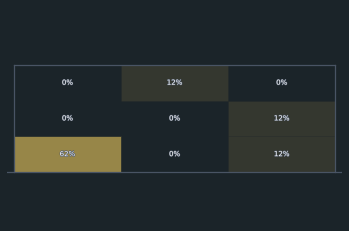

In [298]:
player = 'Per Frick'
player_shot_percentage = shot_pct_per_goal_mouth(player, all_matches_df)
map_plot = shot_map_plot(player, player_shot_percentage)
map_plot  

plt.savefig(
    "C:/Users/al.eriksson/Documents/Python/Football/ShotTargetPlayer.jpg",
    dpi = 600,
    bbox_inches="tight",
    edgecolor="none",
    transparent = False
)